<a href="https://colab.research.google.com/github/shutiman/Course-Data-Lit-/blob/master/Airline_hist_data_lit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Lit (Analyzing Distributions)
We are going to analyze a dataset of observations of flights departing NYC in 2013 (avalible in https://github.com/WillKoehrsen/Data-Analysis/tree/master/univariate_dist/data), and try to figure out which airline is most likely to get you to your destination on time. Through the data analisys using density plots. 

The first part of this notebook is based on this tutorial "https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0"

By: Fernando Chica

### Import libraries

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [0]:
# filename contain the link to the dataset

filename = 'https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/formatted_flights.csv'

# airlines contain the information about the name of all the airlines in the dataset
# will be useful in the to know all the airlines avaible

airlines=['Endeavor Air Inc', 'American Airlines Inc', 'Alaska Airlines Inc',
'JetBlue Airways', 'Delta Air Lines Inc', 'ExpressJet Airlines Inc',
'Frontier Airlines Inc', 'AirTran Airways Corporation', 'Hawaiian Airlines Inc',
'Envoy Air', 'SkyWest Airlines Inc', 'United Air Lines Inc', 'US Airways Inc',
'Virgin America', 'Southwest Airlines Co', 'Mesa Airlines Inc']

In [12]:
# Now, we read the dataset and drop the column 'Unnamed: 0' because is an index column and with the pandas dataframe will be redundant information

data = pd.read_csv(filename)
data = data.drop(columns='Unnamed: 0')
data.head(10)


,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


### Visualization

To understand the behavior of the airlines we are going to use density plot due to it show information about the shape of the data distribution and not affected by the number of bins, like in a histogram. Besides, it allow us to more easy to visualize the diferences in the airlines.

Text(0, 0.5, 'Density')

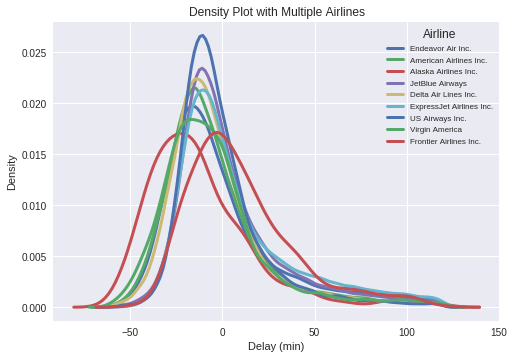

In [5]:
# List of 8 airlines to plot

airlines = ['Endeavor Air Inc.',
'American Airlines Inc.',
'Alaska Airlines Inc.',
'JetBlue Airways',
'Delta Air Lines Inc.',
'ExpressJet Airlines Inc.',
'US Airways Inc.',
'Virgin America',
'Frontier Airlines Inc.']

# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = data[data['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 8}, title = 'Airline',loc= 'best')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

we can notice that the 'Alaska Airlines Inc.' is the airline with the lowest delay than the other seven airlines shown.  Continuing, now we visualize other 4 airlines. The main idea of make different plots is to show more clear the density plots.

Text(0, 0.5, 'Density')

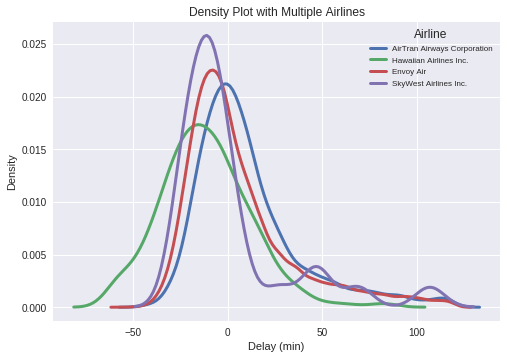

In [6]:
airlines= ['AirTran Airways Corporation',
'Hawaiian Airlines Inc.',
'Envoy Air',
'SkyWest Airlines Inc.']

# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = data[data['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 8}, title = 'Airline',loc= 'best')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

In this case the 'Hawaiian Airlines Inc.', has the lowest delay.


Text(0, 0.5, 'Density')

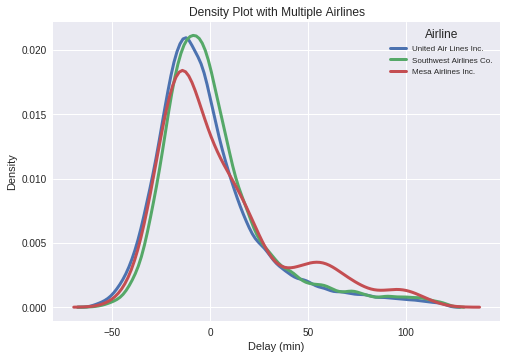

In [7]:
airlines= ['United Air Lines Inc.',
'Southwest Airlines Co.',
'Mesa Airlines Inc.']

# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = data[data['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 8}, title = 'Airline',loc= 'best')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

Finally, the most lowest density plots (in terms of delay) are compare in a graph.In this case, there are two airlines that present lowest delay; 'Hawaiian Airlines Inc.', 'Alaska Airlines Inc.'. It can be noticed that the area under the curve of the densitiy plot, in both of cases the majority are before the zero, but the Hawaiian Airlines has a side shift to the right regarding to the Alaska Airlines. Another factor to consider is that the "Hawaiian" get teir lowest value between 50 to 100, in contrast the "Alaska" get their lowest value near to 150. So, both of this airlines could be a good option to avoid delaye flights.

Text(0, 0.5, 'Density')

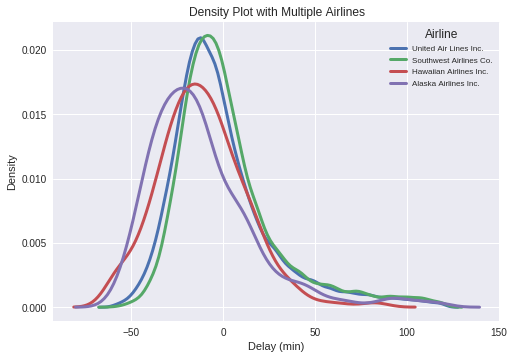

In [8]:
airlines= ['United Air Lines Inc.',
'Southwest Airlines Co.',
'Hawaiian Airlines Inc.',
'Alaska Airlines Inc.']

# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = data[data['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 8}, title = 'Airline',loc= 'best')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

## Central Limit Theorem

To analyze the central limit theorem, we are going to extract few random sub samples (same size) of all the dataset. Then we'll visualize the density plots of this subsamples.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


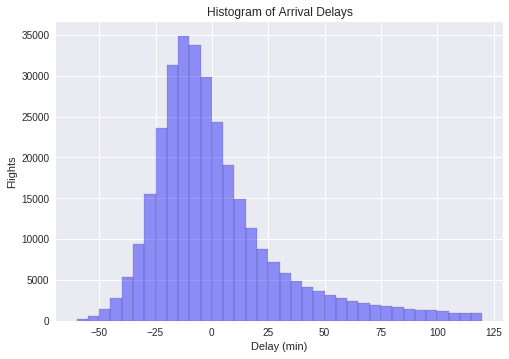

In [25]:
# Plot the histogram of all the dataset

sns.distplot(data['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)'); plt.ylabel('Flights');

In [28]:
# Calculate the mean and the standar desviation (std) of all the dataset 
print('The mean of the dataset is:', np.mean(data['arr_delay']), 'and the std is:', np.std(data['arr_delay']))

The mean of the dataset is: 1.2971432896160044 and the std is: 29.064355196654887


Now we are going to extract samples of the dataset and measure the mean and the std.

In [0]:
# function used to extrac a subsample of the dataset and get their mean and the std 
# input p1 = percentage of the total size of the data to use like subsample
# data = data to extract the subsample

def get_subset(p1,data):
  row = len(data)
  size = np.round(int(p1*row/100))
  datarnd = np.random.randint(0,row,size=size)
  datacentrl=np.array(data[datarnd])
  
  msub = np.mean(datacentrl)
  stdsub = np.std(datacentrl)
  
  return msub,stdsub,datacentrl
  
  


First, using a small subsample (1% of all the dataset, aprox=3171 *samples*). In all the plots, only the density plot of the all dataset containts shade.

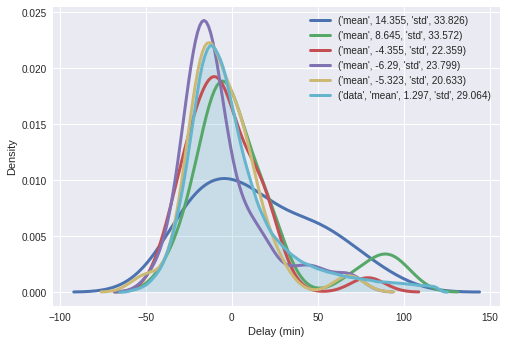

In [190]:
for x in range(5):
  [mn,st, subset]=get_subset(0.01,data['arr_delay'])
  sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3}, 
               label = ('mean',np.round(mn,decimals=3),'std',np.round(st,decimals=3)))

sns.distplot(data['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
             label = ('data','mean',np.round(np.mean(data['arr_delay']),decimals=3),
                      'std',np.round(np.std(data['arr_delay']),decimals=3)))

plt.xlabel('Delay (min)'); plt.ylabel('Density');


In [0]:
Second, using more samples a 5% of all the dataset, aprox=15855 samples

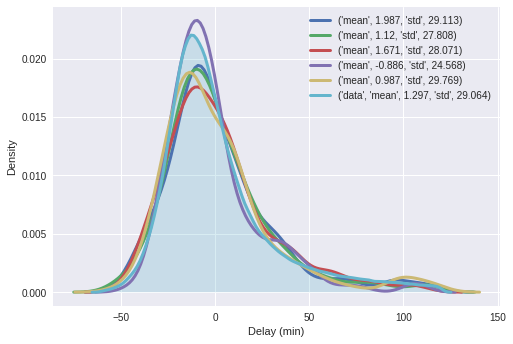

In [194]:
for x in range(5):
  [mn,st, subset]=get_subset(0.05,data['arr_delay'])
  sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3}, 
               label = ('mean',np.round(mn,decimals=3),'std',np.round(st,decimals=3)))

sns.distplot(data['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
             label = ('data','mean',np.round(np.mean(data['arr_delay']),decimals=3),
                      'std',np.round(np.std(data['arr_delay']),decimals=3)))

plt.xlabel('Delay (min)'); plt.ylabel('Density');

Then, using a 10% of all the dataset, aprox 31 711 samples

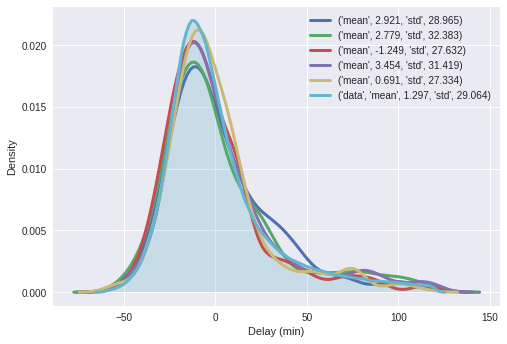

In [201]:
for x in range(5):
  [mn,st, subset]=get_subset(0.1,data['arr_delay'])
  sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3}, 
               label = ('mean',np.round(mn,decimals=3),'std',np.round(st,decimals=3)))

sns.distplot(data['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
             label = ('data','mean',np.round(np.mean(data['arr_delay']),decimals=3),
                      'std',np.round(np.std(data['arr_delay']),decimals=3)))

plt.xlabel('Delay (min)'); plt.ylabel('Density');

Finally, using a bigger subsampling, 30% of all the dataset, aprox 95133 samples

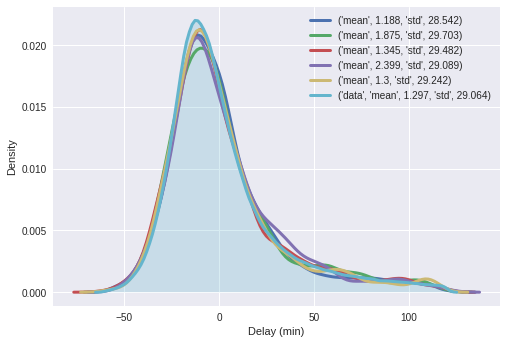

In [208]:
for x in range(5):
  [mn,st, subset]=get_subset(0.3,data['arr_delay'])
  sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3}, 
               label = ('mean',np.round(mn,decimals=3),'std',np.round(st,decimals=3)))

sns.distplot(data['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
             label = ('data','mean',np.round(np.mean(data['arr_delay']),decimals=3),
                      'std',np.round(np.std(data['arr_delay']),decimals=3)))

plt.xlabel('Delay (min)'); plt.ylabel('Density');

It can be noticed that the sampling distribution of the subsamples is less spread that the all dataset (data in the plot). On the other hand, the sampling distribution aproximates to a normal distribution depending on the size of the sub sample, in a small subsamples the density plot is more spread. Also, the size of the subsamples, when its more bigger start to aproximate to the density plots of the original dataset, this fact also happen with the mean and the std. 